In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            plot_confusion_matrix) 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
X_train = pd.read_csv('../data/x_train_ss_processed.csv')
X_test = pd.read_csv('../data/x_test_ss_processed.csv')
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

In [3]:
X_train.shape

(17696, 25)

In [4]:
X_test.shape

(4425, 25)

In [5]:
y_train.shape

(17696, 1)

In [6]:
y_test.shape

(4425, 1)

In [7]:
y_train.head()

,happening
0,2
1,2
2,2
3,0
4,2


In [8]:
#To print model scores
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=42,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

In [9]:
def rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth):
   
    '''Gridsearching RandomForest'''
    
#     X = df.drop(target_col, axis=1)   # predictors
#     y = df[target_col]                # target
    
#     X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                        y, test_size = test_size, random_state=42) # TT split
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    

    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

### Random Forest

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 11, 'n_estimators': 80}
best max_depth: 11
best n_estimators: 80
Random Forest Score: 0.79 +- 0.011

Confusion Matrix:

[[ 495   57  170]
 [ 110  185  424]
 [  65   92 2827]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       722
           1       0.55      0.26      0.35       719
           2       0.83      0.95      0.88      2984

    accuracy                           0.79      4425
   macro avg       0.71      0.63      0.65      4425
weighted avg       0.77      0.79      0.77      4425

0.792542372881356
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


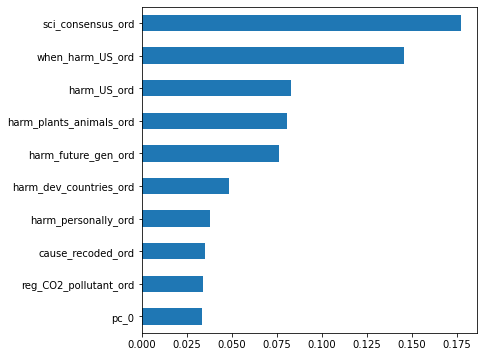

In [10]:
n_estimators = list(range(10,250,10))
max_depth = list(range(1, 25, 2)) 
rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth)

**The top features ranked by their importance are as follows after RandomForestClassifier():**
- sci_consensus_ord
- when_harm_US_ord
- harm_US_ord
- harm_plants_animals_ord
- harm_future_gen_ord
- harm_dev_countries_ord
- harm_personally_ord
- cause_recorded_ord
- reg_CO2_pollutant_ord


In [13]:
def decision_tree_score(X_train, X_test, y_train, y_test,max_depth):
    cv_kf = KFold(n_splits=10,
                  shuffle=True,
                  random_state=30113)


    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()

    dt_params = {
            'criterion':['gini','entropy'],
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, verbose=1, n_jobs=-1)
    

    rf_gs.fit(X_train,y_train)

    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    criterion_best = rf_gs.best_params_['criterion']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)

    best_rf_gs = DecisionTreeClassifier(max_depth=max_depth_best,criterion=criterion_best) # instantiate the best model
    
    score(best_rf_gs, 'Decision Tree', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return


### Decision Tree

Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearch results
The best parameters on the training data are:
 {'criterion': 'entropy', 'max_depth': 5}
best max_depth: 5
Decision Tree Score: 0.78 +- 0.013

Confusion Matrix:

[[ 476   46  200]
 [ 108  156  455]
 [  65   79 2840]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       722
           1       0.56      0.22      0.31       719
           2       0.81      0.95      0.88      2984

    accuracy                           0.78      4425
   macro avg       0.70      0.61      0.63      4425
weighted avg       0.76      0.78      0.76      4425

0.7846327683615819
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


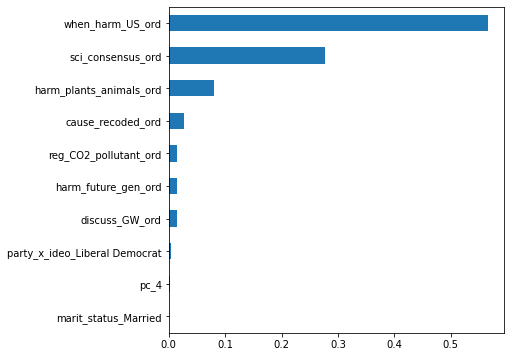

In [14]:
n_estimators = list(range(4,250,10))
max_depth = list(range(1, 25, 2)) 
decision_tree_score(X_train, X_test, y_train, y_test,max_depth)

**The top features ranked by their importance are as follows after RandomForestClassifier():**

- when_harm_US_ord
- sci_consensus_ord
- harm_plants_animals_ord
- cause_recorded_ord
- reg_CO2_pollutant_ord
- harm_future_gen_ord
- discuss_GW_ord
- party/_x_ideo_Liberal Democrat
- marit_status_Married

As is clear these features are very similar but differently ordered based on feature importances.

In [15]:
def bagging_score(base_model,X_train, X_test, y_train, y_test,n_estimators):
    cv_kf = KFold(n_splits=10,
                  shuffle=True,
                  random_state=30113)
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    dt_params = {
            'n_estimators':n_estimators,
            }   # parameters for grid search
    
    bagger = BaggingClassifier(base_estimator=base_model, random_state=42)
    rf_gs = GridSearchCV(bagger, dt_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train)
    print('GridSearch results for base estimator {}'.format(base_model))
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters

    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators

    print("best n_estimators:",n_estimators_best)
    best_rf_gs = BaggingClassifier(base_estimator=base_model,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Bagger', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    


### Bagging Classifier

In [16]:
n_estimators = list(range(10,250,10))
# max_features = list(range(3, 26)) 
bagging_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test,n_estimators)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearch results for base estimator DecisionTreeClassifier()
The best parameters on the training data are:
 {'n_estimators': 240}
best n_estimators: 240
Bagger Score: 0.78 +- 0.010

Confusion Matrix:

[[ 477   97  148]
 [  99  241  379]
 [  69  171 2744]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       722
           1       0.47      0.34      0.39       719
           2       0.84      0.92      0.88      2984

    accuracy                           0.78      4425
   macro avg       0.68      0.64      0.66      4425
weighted avg       0.76      0.78      0.77      4425

0.7823728813559322


**The accuracies for different models are as follows:**
1. RandomForestClassifier : 0.79 +- 0.011
2. DecisionTreeClassifier : 0.78 +- 0.013
3. BaggingClassifier : 0.78+-0.010
So we would go with Random ForestClassifier


